In [18]:


# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib
#for saving our machine learning model



In [2]:
# 2. Load Dataset
df = pd.read_csv("/content/ParisHousing.csv")




In [4]:
# Preview dataset
print("Dataset preview:")
print(df.head())
df.head()


Dataset preview:
   squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0             7  7

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [5]:
# 3. Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())




Missing values in dataset:
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64


In [6]:
# 4. Features and Target
# Assuming 'price' is the target column
X = df.drop("price", axis=1)
y = df["price"]


In [7]:

# 5. Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:

# 6. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:

# 7. Make Predictions
y_pred = model.predict(X_test)


In [10]:

# 8. Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



In [11]:
print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



Model Evaluation:
Mean Absolute Error: 1510.03
Mean Squared Error: 3695708.44
Root Mean Squared Error: 1922.42
R² Score: 1.00


In [12]:

# 9. Predict a Sample
sample_data = X_test.iloc[0].values.reshape(1, -1)
predicted_price = model.predict(sample_data)
print(f"\nPredicted Price for first test sample: {predicted_price[0]:.2f}")


Predicted Price for first test sample: 7962638.49


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


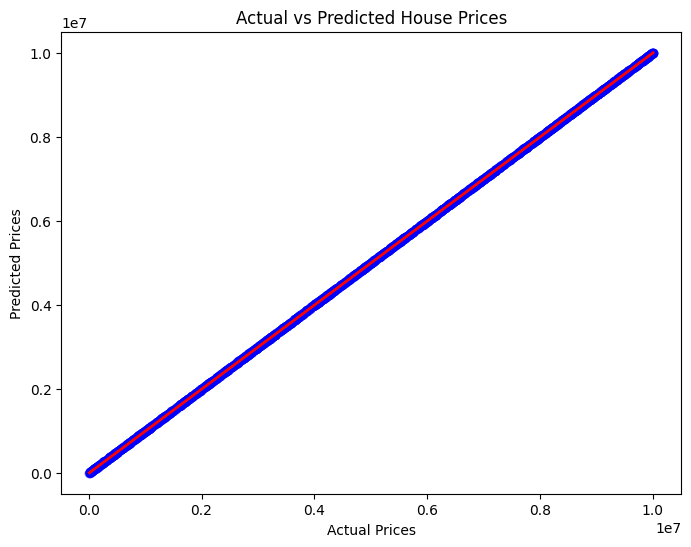

In [17]:
# 10. Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [19]:
joblib.dump(model, "house_price_model.pkl")
joblib.dump(list(X.columns), "model_columns.pkl")

['model_columns.pkl']